In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
image = Image.open('images/cat_2.jpg').convert('L')

print(image.size)
print(image.mode)

(1280, 853)
L


In [3]:
def contrast_reduction(image, a, b):
    image = np.array(image)
    image = (image / image.max()) * (b - a) + a
    pil_image = Image.fromarray(np.uint8(image))
    return pil_image

In [4]:
def calc_histogram(image, label):
    histogram = np.zeros(256)
    for pixel in image.getdata():
        histogram[pixel] += 1

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 6)
    ax.bar(range(256), histogram, color='skyblue', edgecolor='gray', width=1.0)

    ax.set_xlabel('Pixel Value', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title(label, fontsize=16, fontweight='bold')
    ax.set_xlim(0, 255)
    ax.set_ylim(0, max(histogram) * 1.1)
    ax.grid(True, linestyle='--', alpha=0.6)

    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    plt.show()

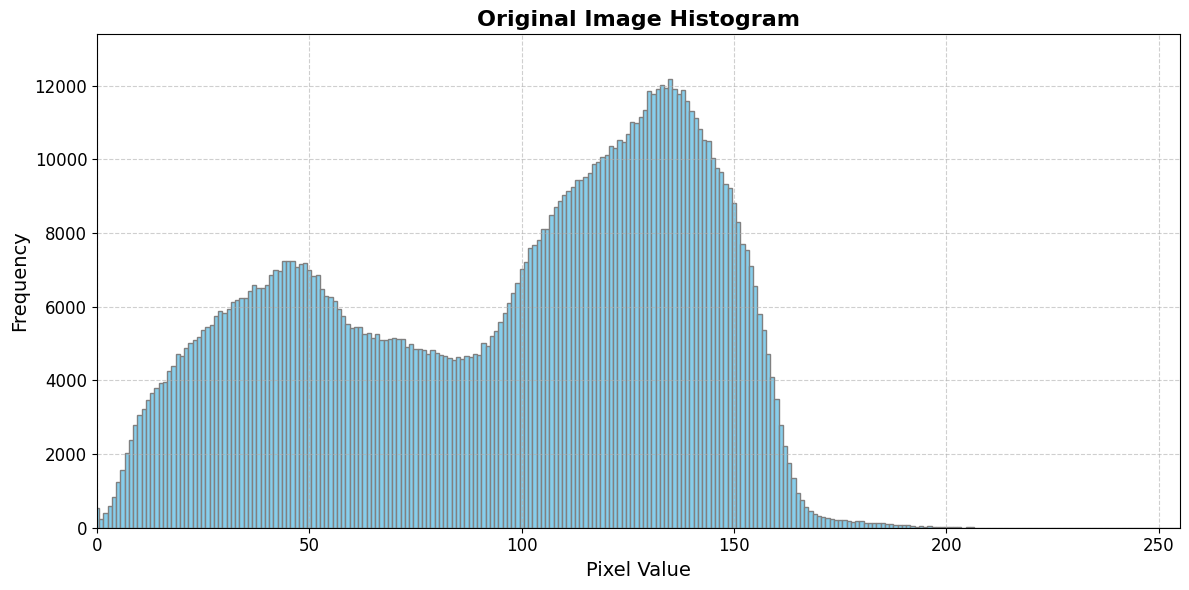

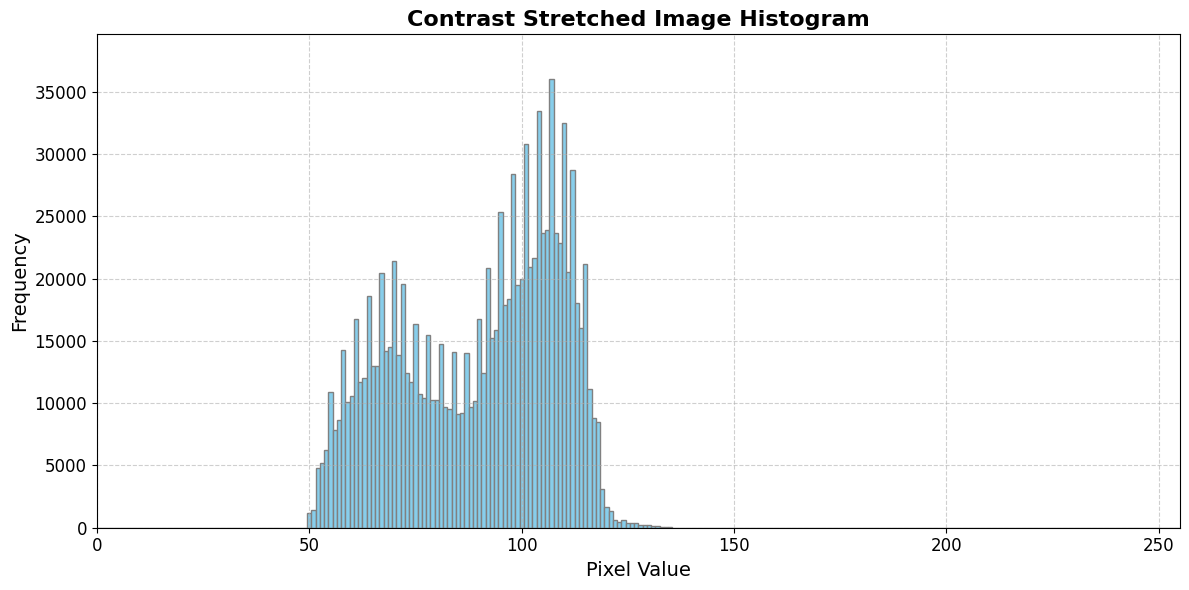

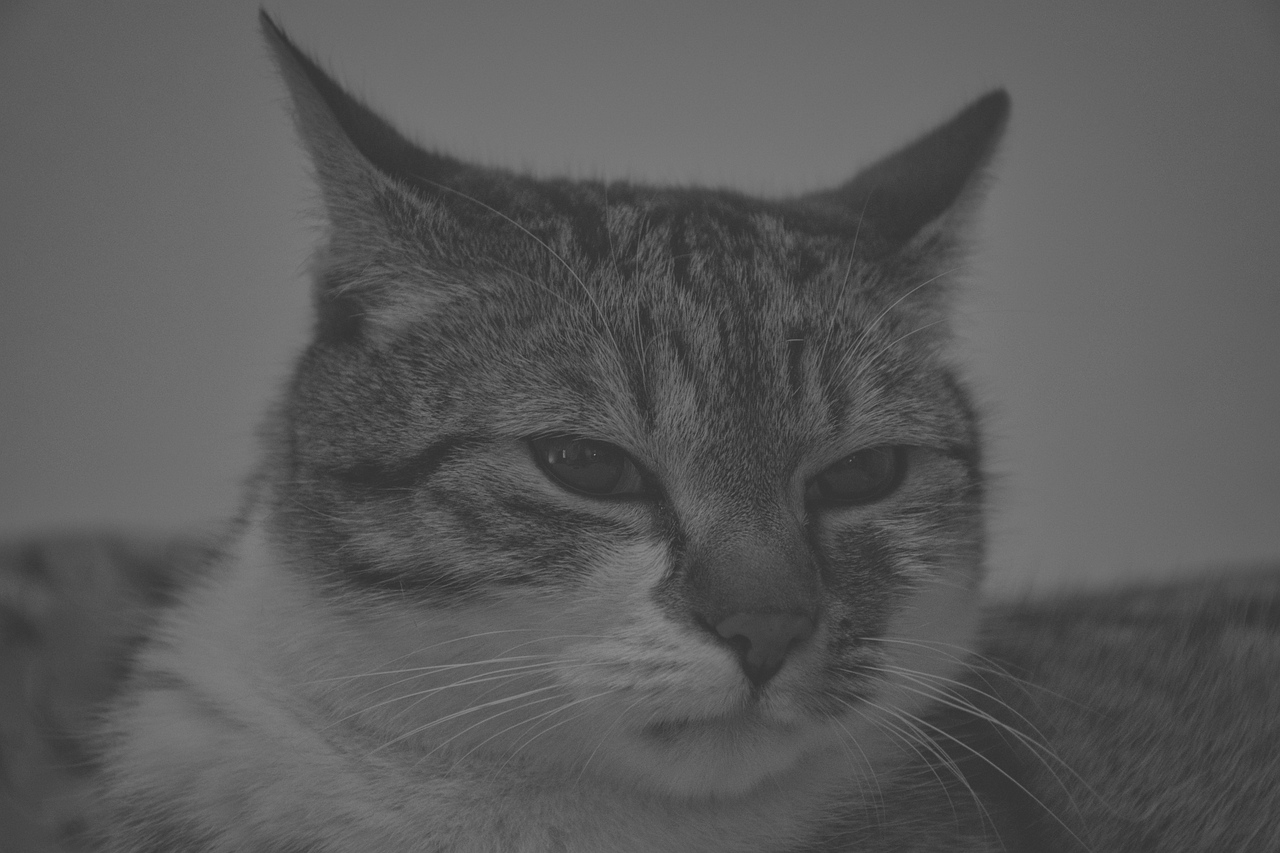

In [5]:
calc_histogram(image, 'Original Image Histogram')
contrast = contrast_reduction(image, 50, 150)
calc_histogram(contrast, 'Contrast Reduced Image Histogram')
display(contrast)

In [6]:
def constrast_stretching(image, a, b, a2, b2):
    image = np.array(image)
    image = (((image - a) / (b - a)) * (b2 - a2)) + a2
    return Image.fromarray(np.uint8(image))

a: 52.543801624805745 b: 127.18155557038767 a2: 12.681123027209033 b2: 187.31887697279097


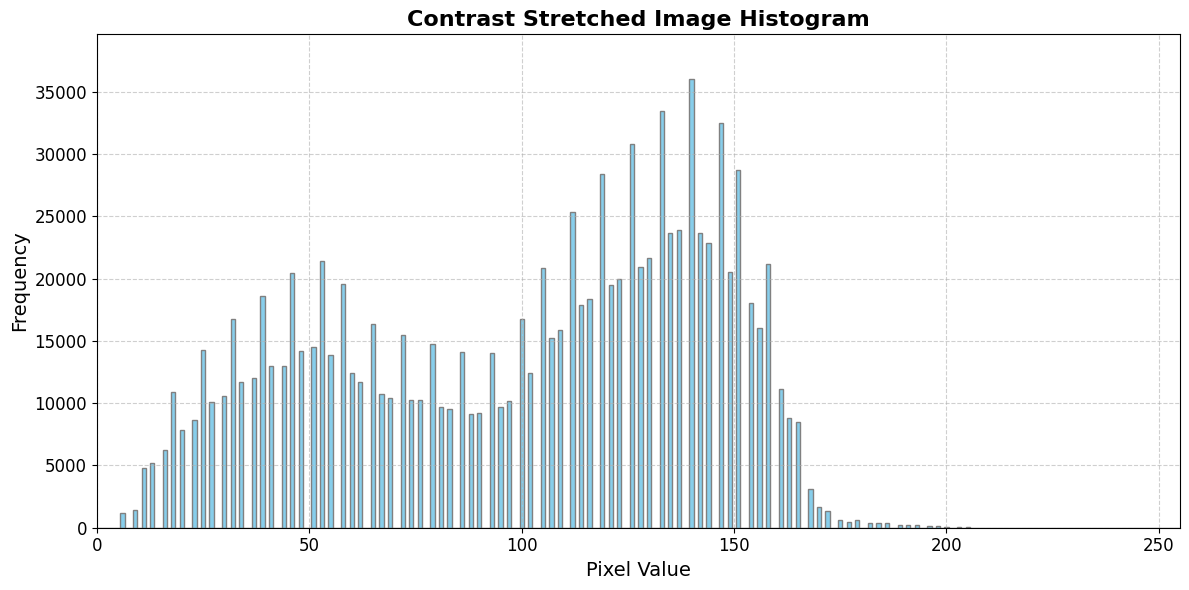

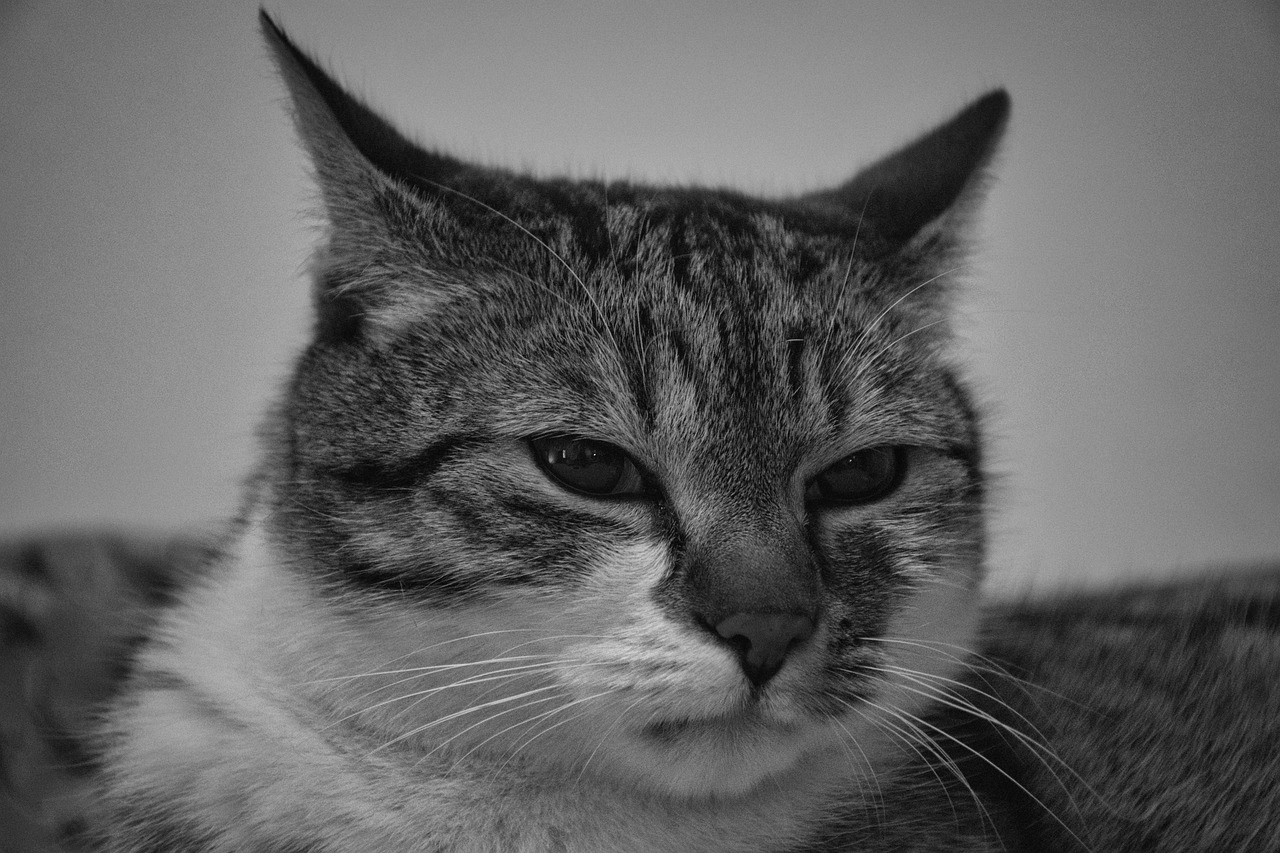

In [7]:
std_contrast = np.std(np.array(contrast))
mean_contrast = np.mean(np.array(contrast))
a = mean_contrast - 2 * std_contrast
b = mean_contrast + 2 * std_contrast
a2 = np.array(contrast).min() - 2 * np.std(np.array(contrast)) #if np.array(contrast).min() < 0 else 0
b2 = np.array(contrast).max() + 2 * np.std(np.array(contrast)) #if np.array(contrast).max() > 255 else 255
print("a:", a, "b:", b, "a2:", a2, "b2:", b2)
contrast_stretch = constrast_stretching(contrast, a, b, a2, b2)
calc_histogram(contrast_stretch, 'Contrast Stretched Image Histogram')
display(contrast_stretch)